In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset['smoker'] = dataset['smoker'].map({'no': 0, 'yes': 1})
dataset['sex'] = dataset['sex'].map({'female': 1, 'male': 0})

In [7]:
dataset = pd.get_dummies(
    dataset,
    columns=['region'],
    prefix='',
    prefix_sep=''
)

In [8]:
dataset.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,1,27.9,0,1,16884.92,0,0,0,1
1,18,0,33.8,1,0,1725.55,0,0,1,0
2,28,0,33.0,3,0,4449.46,0,0,1,0
3,33,0,22.7,0,0,21984.47,0,1,0,0
4,32,0,28.9,0,0,3866.86,0,1,0,0


In [9]:
from sklearn.model_selection import train_test_split

tts_data = dataset.copy()

X = tts_data.drop('expenses', axis=1)
y = tts_data.pop('expenses')

train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    X, y,
    test_size=0.2
)

test_dataset.tail()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
1183,48,1,27.4,1,0,1,0,0,0
1002,24,0,25.8,0,0,0,0,0,1
348,36,1,29.9,1,0,0,0,1,0
791,19,0,27.6,0,0,0,0,0,1
124,47,1,33.9,3,0,0,1,0,0


In [10]:
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

2024-03-01 23:14:18.585579: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-03-01 23:14:18.585603: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (notebook): /proc/driver/nvidia/version does not exist
2024-03-01 23:14:18.585972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(units=1)
])

In [37]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mean_absolute_error'], # Decides about pass the tests from website
    metrics=['mean_absolute_error', 'mean_squared_error']  # mse is required in tests from website
)

In [38]:
history = model.fit(
    train_dataset, 
    train_labels,
    epochs=60,
    verbose=0,
)

In [39]:
model.evaluate(
    test_dataset,
    test_labels,
    verbose=1
)

9/9 [==============================] - 0s 1ms/step - loss: 1642.0941 - mean_absolute_error: 1642.0941 - mean_squared_error: 20872042.0000


[1642.0941162109375, 1642.0941162109375, 20872042.0]

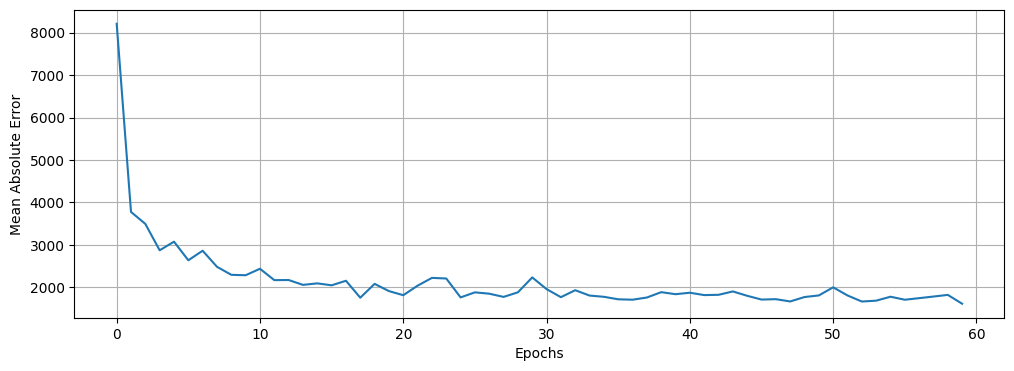

In [40]:
plt.figure(figsize=(12,4))
plt.plot(
    history.history['mean_absolute_error']
)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.grid(True)
plt.show()

9/9 - 0s - loss: 1642.0941 - mean_absolute_error: 1642.0941 - mean_squared_error: 20872042.0000 - 24ms/epoch - 3ms/step
9/9 [==============================] - 0s 839us/step


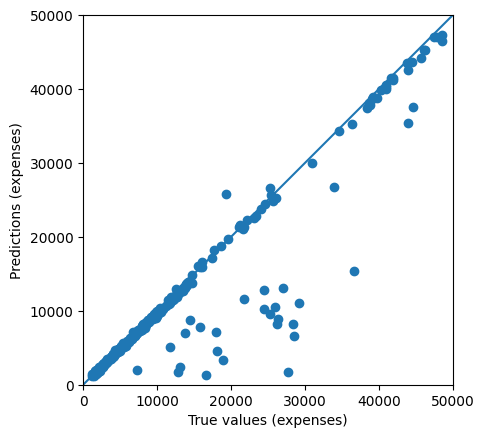

In [41]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
